# **Heart Disease Prediction using Machine Learning**

#### **Problem Statement**

Build a model to predict weather the person has **heart disease** or not.

##### **Importing the libraries**

In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### **Load Dataset**

In [42]:
df = pd.read_csv("C:/Users/ADIO/Desktop/Heart_Disease/Heart_Disease/data/clevelanda.csv")
df.head(5)

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


**Getting some insights from the dataset**

In [12]:
df.shape

(303, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [14]:
col=['gender','cp','fps','restecg','exang','slope','ca','thal','class']
for column in col:
  print(column, "has following ", len(df[column].unique()), "uniques values")
  print(df[column].unique())

gender has following  2 uniques values
[1 0]
cp has following  4 uniques values
[1 4 3 2]
fps has following  2 uniques values
[1 0]
restecg has following  3 uniques values
[2 0 1]
exang has following  2 uniques values
[0 1]
slope has following  3 uniques values
[3 2 1]
ca has following  5 uniques values
['0' '3' '2' '1' '?']
thal has following  4 uniques values
['6' '3' '7' '?']
class has following  5 uniques values
[0 2 1 3 4]


Removing rows which contains improper values

In [15]:
df.drop(df[df['ca']=='?'].index,inplace =True)
df.drop(df[df['thal']=='?'].index,inplace =True)

**In target feature "class", 0 means normal and other than 0 means person has heart disease. So replace all the other values except 0 with 1.**

In [16]:
df.loc[df['class'] != 0, 'class'] = 1

In [17]:
df.describe()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


#### **Attribute Information:**


1. **age**: age in years

2. **gender**: 1 = male; 0 = female

3. **cp**: chest pain type

- Value 1: typical angina

- Value 2: atypical angina

- Value 3: non-anginal pain

- Value 4: asymptomatic

4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

5. **chol**: serum cholesterols in mg/dl

6. **fps**: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. **restecg**: resting electrocardiographic results

- Value 0: normal

- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

- Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria

8. **thalach**: maximum heart rate achieved

9. **exang**: exercise induced angina (1 = yes; 0 = no)

10. **oldpeak**: ST depression induced by exercise relative to rest

11. **slope**: the slope of the peak exercise ST segment

- Value 1: upsloping

- Value 2: flat

- Value 3: Downsloping

12. **ca**: number of major vessels (0–3) colored by fluoroscopy

13. **thal**: 3 = normal; 6 = fixed defect; 7 = reversible defect

14. **class**: 0 = normal;  1,2,3,4 = Heart Disease

#### **Feature selection**

C:\Users\ADIO\AppData\Local\Temp\ipykernel_14056\790092380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


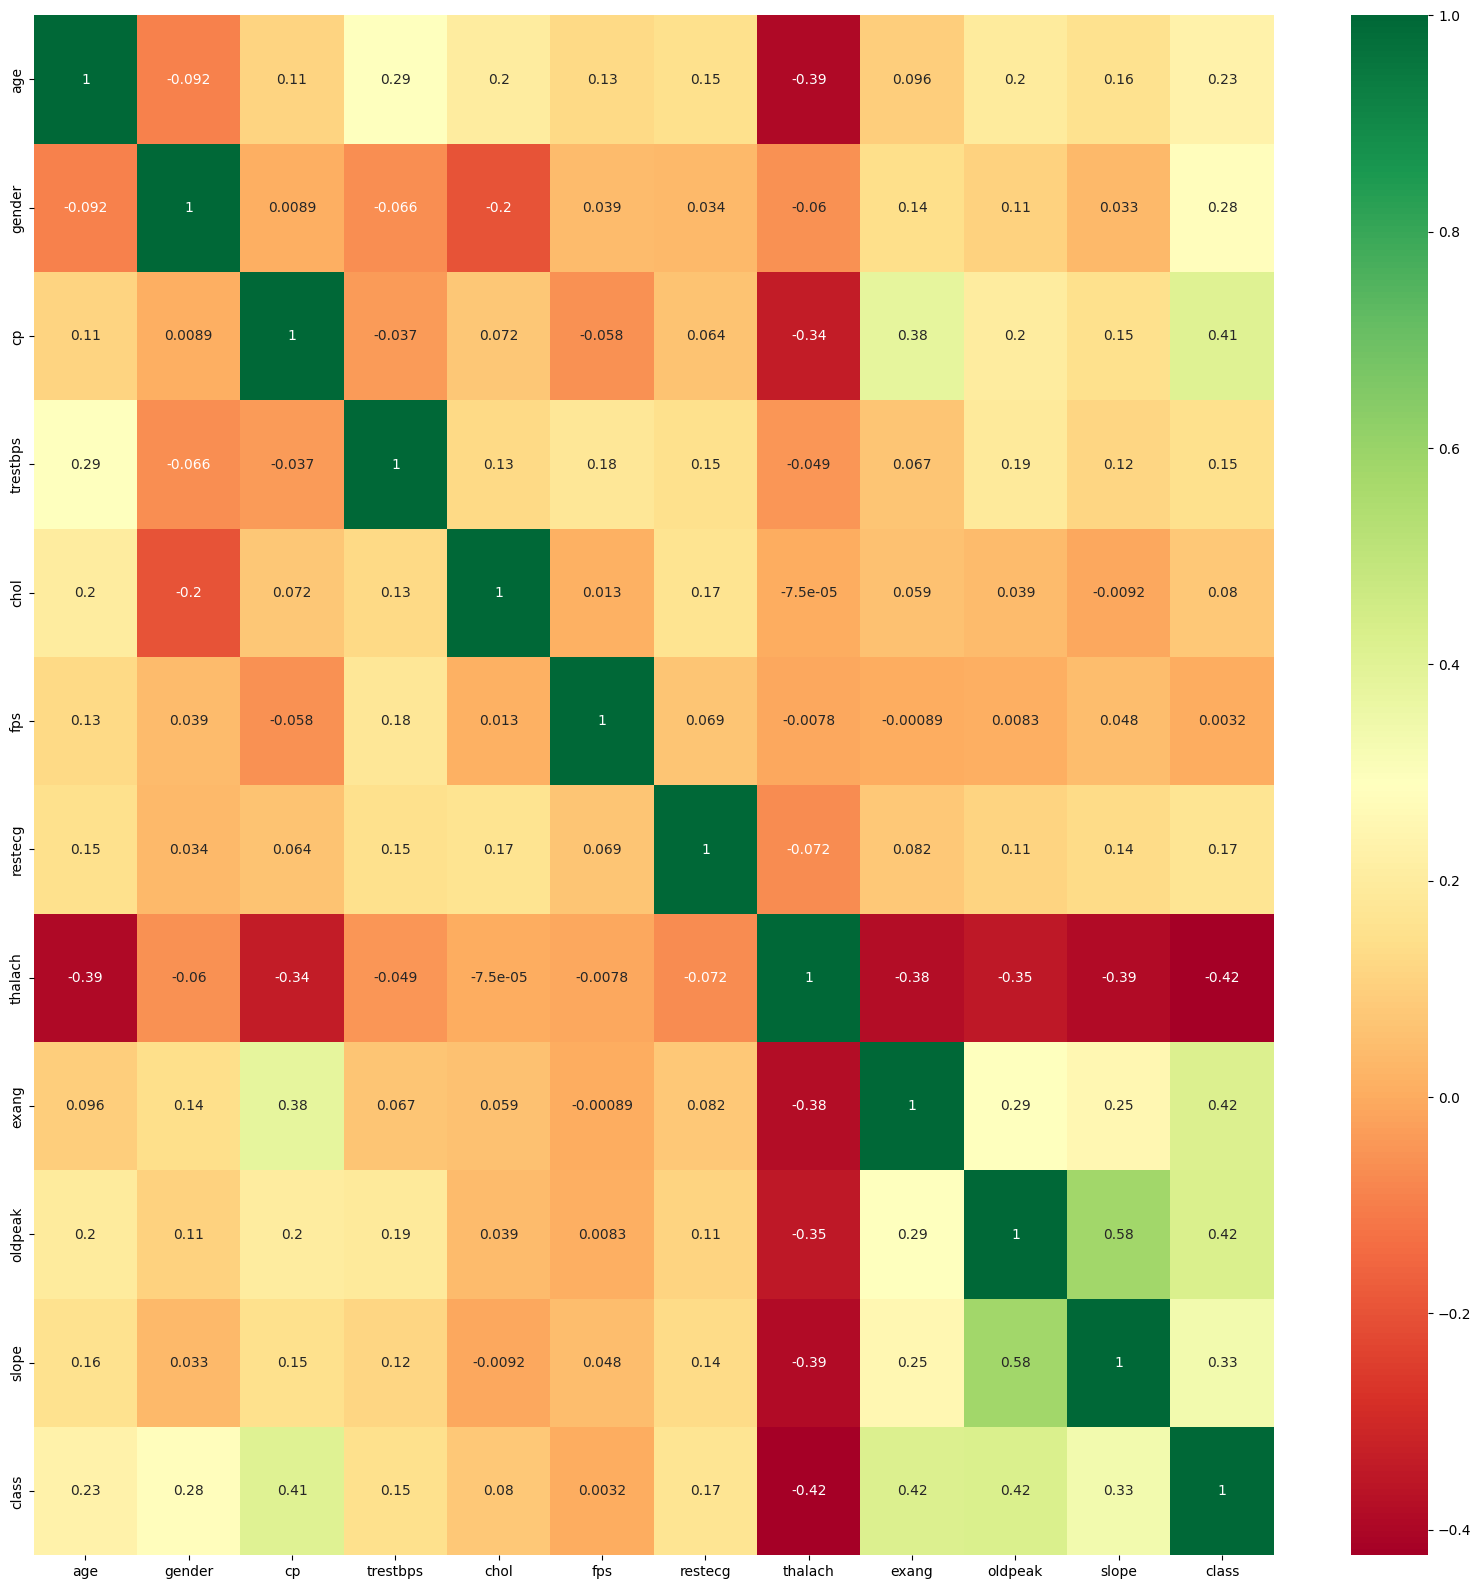

In [18]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### We didn't find any co-relation between the features

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fps'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

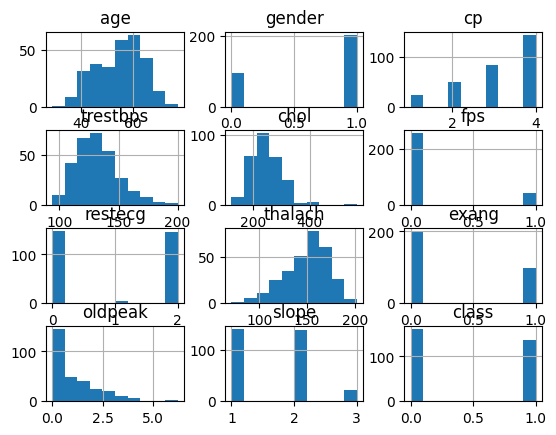

In [19]:
df.hist()

**It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.**

<Axes: xlabel='class', ylabel='count'>

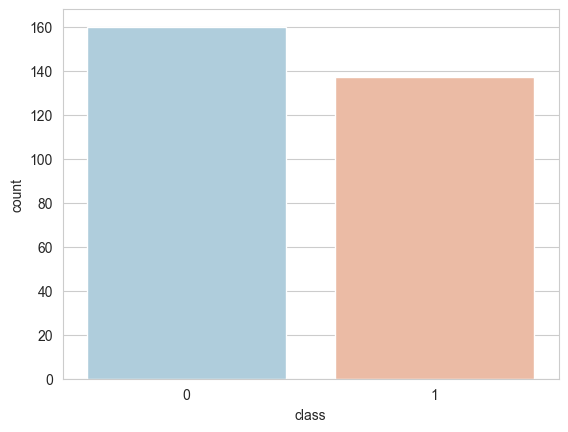

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=df,palette='RdBu_r')

**Creating dummy variables fo the categorical features**

In [28]:
df.loc[56]

age          50
gender        1
cp            3
trestbps    140
chol        233
fps           0
restecg       0
thalach     163
exang         0
oldpeak     0.6
slope         2
ca            1
thal          7
class         1
Name: 56, dtype: object

In [29]:
dataset = pd.get_dummies(df, columns = ['gender', 'cp', 'fps', 'restecg', 'exang', 'slope', 'ca', 'thal'])# creating dummy variable

**Dataset after creating dummy variables for categorical fetures**

In [30]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,class,gender_0,gender_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


**Total Number of columns after creating dummy variables.**

In [31]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'class', 'gender_0',
       'gender_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fps_0', 'fps_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_1',
       'slope_2', 'slope_3', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_3',
       'thal_6', 'thal_7'],
      dtype='object')

**Getting dependent and independent variables.**

In [32]:
y = dataset['class']
X = dataset.drop(['class'], axis = 1) 

**Splitting dataset into train and test data.** 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)  

In [34]:
X_test

,age,trestbps,chol,thalach,oldpeak,gender_0,gender_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
56,50,140,233,163,0.6,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
118,63,130,330,132,1.8,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
133,51,140,261,186,0.0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
24,60,130,206,132,2.4,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
265,42,136,315,125,1.8,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
183,59,178,270,145,4.2,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1
254,43,115,303,181,1.2,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
43,59,150,212,157,1.6,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
282,55,128,205,130,2.0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
252,64,128,263,105,0.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


**Indetifying columns which need to be scaled.**

In [35]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # we have taken these columns for scale down

**Performing scaling using standard scaler after splitting the data into train and test set to avoid data leakage.**

In [36]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
sc=StandardScaler().fit(X_train[columns_to_scale])
X_train[columns_to_scale] = sc.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = sc.transform(X_test[columns_to_scale])

In [44]:
X_train

,age,trestbps,chol,thalach,oldpeak,gender_0,gender_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
267,0.484982,-0.341181,-0.619502,-0.698097,0.987515,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
97,0.594868,1.034183,0.168169,0.313151,1.335403,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
184,0.594868,1.492637,1.093683,0.489020,-0.925865,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
170,1.693726,1.607251,0.384779,-1.665378,1.596318,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
154,1.034411,-0.685022,-0.068132,-2.368855,0.987515,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.924525,-0.111954,0.089402,-0.126522,0.291741,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
73,1.144297,-1.258090,-0.028748,0.357118,-0.404034,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
119,1.144297,0.174580,0.089402,-1.005868,1.509346,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
191,-0.394106,0.461114,0.955841,-1.225705,2.726952,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [37]:
X_train.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'gender_0', 'gender_1',
       'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fps_0', 'fps_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_1', 'slope_2',
       'slope_3', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_3', 'thal_6',
       'thal_7'],
      dtype='object')

**KNeighborsClassifier**

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
## Training and testing the model
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.8333333333333334

In [40]:
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
score.mean()

0.8103260869565219

**model after attributes tunning**

In [257]:
knn_classifier  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=1,
 weights='uniform')
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9166666666666666

In [258]:
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
score.mean()

0.8230072463768116

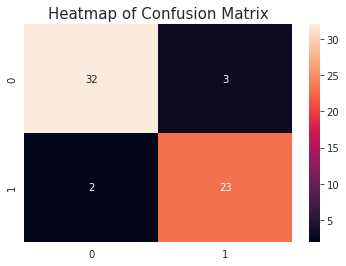

In [259]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [260]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.88      0.92      0.90        25

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



**Random Forest Classifier**

In [261]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8666666666666667

In [262]:
score=cross_val_score(rf_classifier,X_train,y_train,cv=10)
score.mean()

0.822644927536232

**XGBoost Classifier**

In [263]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=23,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.8833333333333333

In [264]:
score=cross_val_score(xgb_classifier,X_train,y_train,cv=10)
score.mean()

0.813949275362319

**AdaBoost with Random Forest**

In [265]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)

In [266]:
y_pred_adb = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred_adb)

0.9166666666666666

In [267]:
score=cross_val_score(ada_clf,X_train,y_train,cv=10)
score.mean()

0.797644927536232

**Gradient Boosting**

In [268]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [269]:
y_pred_adb = gbc_clf.predict(X_test)
accuracy_score(y_test, y_pred_adb)

0.8166666666666667

**Out of all the model that we build, KKNeighborsClassifier give s the best result with 92% accuracy. So we are going to use this model in our project.**

**Save the model**

In [270]:
import pickle

# save model
pickle.dump(knn_classifier, open('/content/drive/MyDrive/Data sets/Heart Disease/model.pkl', 'wb'))

**Saving the standard scaler**

In [271]:
pickle.dump(sc, open('/content/drive/MyDrive/Data sets/Heart Disease/scaler.pkl','wb'))

#sc = pickle.load(open('file/path/scaler.pkl','rb'))